### Import Library & Dataset Preparation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_dir = './dataset/train'
test_dir = './dataset/test'

In [3]:
sample_generator = ImageDataGenerator(rescale = 1./255,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     rotation_range = 90,
                                     height_shift_range = 0.2,
                                     width_shift_range = 0.2)
sample_images = sample_generator.flow_from_directory(train_dir,
                                                   target_size = (300, 300),
                                                   color_mode = 'rgb',
                                                   class_mode = None,
                                                   batch_size = 1,
                                                   shuffle = True,
                                                   seed = 42)

Found 2520 images belonging to 3 classes.


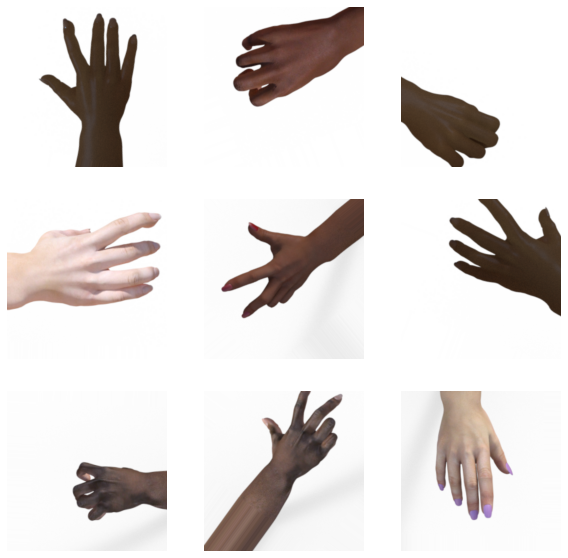

In [4]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = sample_images[i][0]
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

### Data Augmentation

In [5]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    rotation_range = 90,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2)
test_generator = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.7)

In [6]:
train_images = train_generator.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  batch_size = 32,
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'training')
val_images = test_generator.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=True,
                                                seed=42,
                                                subset='training')
test_images = test_generator.flow_from_directory(test_dir,
                                                target_size = (150, 150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=False,
                                                seed=42,
                                                subset='validation')

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,343,491 (12.75 MB)

 Trainable params: 3,343,491 (12.75 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer ='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(train_images,
                   validation_data = val_images,
                   epochs = 10,
                   callbacks = [
                       tf.keras.callbacks.EarlyStopping(
                       monitor = 'val_loss',
                       patience = 5,
                       restore_best_weights = True
                       )
                   ]
                   )

Epoch 1/10


c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 60s 674ms/step - accuracy: 0.3358 - loss: 1.1707 - val_accuracy: 0.3333 - val_loss: 1.0989
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 49s 590ms/step - accuracy: 0.3299 - loss: 1.0976 - val_accuracy: 0.3509 - val_loss: 1.0993
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 542ms/step - accuracy: 0.3795 - loss: 1.0808 - val_accuracy: 0.4035 - val_loss: 1.0268
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 532ms/step - accuracy: 0.4612 - loss: 1.0336 - val_accuracy: 0.6930 - val_loss: 0.9948
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 537ms/step - accuracy: 0.5669 - loss: 0.8712 - val_accuracy: 0.7719 - val_loss: 0.7299
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 539ms/step - accuracy: 0.6599 - loss: 0.7462 - val_accuracy: 0.8421 - val_loss: 0.5493
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 532ms/step - accuracy: 0.7345 - loss: 0.5995 - val_accuracy: 0.8596 - val_loss: 0.3205
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 606ms/step - accuracy: 0.8179 - loss: 0.4701 - val_accuracy: 0.991

Accuracy: 96.90%
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step


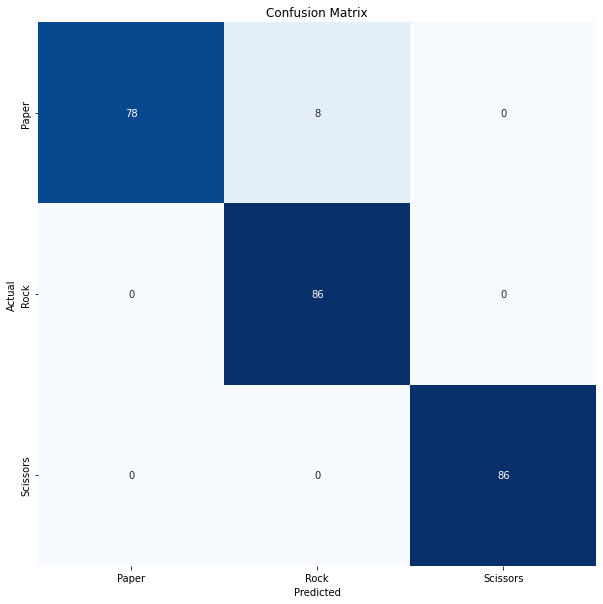

In [9]:
acc = model.evaluate(test_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(test_images), axis=1)


cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_images.labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
model.save('./model/model.h5')

### Try to load the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predictions: Paper

Confidence result: 
Paper 	:   0.98876625
Rock 	:   0.005283044
Scissors 	:   0.005950648


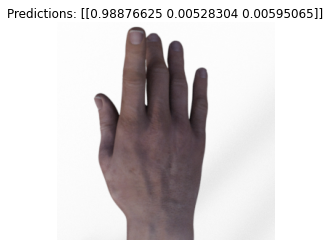

In [4]:
from tensorflow.keras.preprocessing import image
# Load the saved model
model = tf.keras.models.load_model('./model/model.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

img_path = './dataset/validation/paper1.png'

# Print prediction
img_array = preprocess_image(img_path)
predictions = model.predict(img_array)

labels = ['Paper', 'Rock', 'Scissors']
predicted_index = np.argmax(predictions, axis=1)[0]
print("Predictions:", labels[predicted_index])

print("\nConfidence result: ")
for i,j in enumerate(predictions[0]):
    print(labels[i], "\t:  ", j)

plt.imshow(image.load_img(img_path))
plt.title(f'Predictions: {predictions}')
plt.axis('off')
plt.show()
